In [1]:
%matplotlib notebook
#%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# Regresión lineal, Sobreajuste y Validación
## Regresión lineal multivariada
### Ejercicio práctico


Para los datos de consumo de helados, encuentre los parámetros del **hiperplano** que ajuste mejor los datos 

$$
\text{consumo} = \theta_0 + \theta_1 \cdot \text{temperatura} + \theta_2 \cdot \text{precio}
$$



In [2]:
df = pd.read_csv('data/helados.csv', index_col=0)
df.head()

,cons,income,price,temp
1,0.386,78,0.270,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.280,68
5,0.406,76,0.272,69


- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?

In [3]:
b = df['cons'].values
N = len(b)
A = np.ones(shape=(N,3))
A[:,1] = df['temp'].values
A[:,2] = df['price'].values
display(b,A)

array([0.386, 0.374, 0.393, 0.425, 0.406, 0.344, 0.327, 0.288, 0.269,
       0.256, 0.286, 0.298, 0.329, 0.318, 0.381, 0.381, 0.47 , 0.443,
       0.386, 0.342, 0.319, 0.307, 0.284, 0.326, 0.309, 0.359, 0.376,
       0.416, 0.437, 0.548])

array([[ 1.   , 41.   ,  0.27 ],
       [ 1.   , 56.   ,  0.282],
       [ 1.   , 63.   ,  0.277],
       [ 1.   , 68.   ,  0.28 ],
       [ 1.   , 69.   ,  0.272],
       [ 1.   , 65.   ,  0.262],
       [ 1.   , 61.   ,  0.275],
       [ 1.   , 47.   ,  0.267],
       [ 1.   , 32.   ,  0.265],
       [ 1.   , 24.   ,  0.277],
       [ 1.   , 28.   ,  0.282],
       [ 1.   , 26.   ,  0.27 ],
       [ 1.   , 32.   ,  0.272],
       [ 1.   , 40.   ,  0.287],
       [ 1.   , 55.   ,  0.277],
       [ 1.   , 63.   ,  0.287],
       [ 1.   , 72.   ,  0.28 ],
       [ 1.   , 72.   ,  0.277],
       [ 1.   , 67.   ,  0.277],
       [ 1.   , 60.   ,  0.277],
       [ 1.   , 44.   ,  0.292],
       [ 1.   , 40.   ,  0.287],
       [ 1.   , 32.   ,  0.277],
       [ 1.   , 27.   ,  0.285],
       [ 1.   , 28.   ,  0.282],
       [ 1.   , 33.   ,  0.265],
       [ 1.   , 41.   ,  0.265],
       [ 1.   , 52.   ,  0.265],
       [ 1.   , 64.   ,  0.268],
       [ 1.   , 71.   ,  0.26 ]])

- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?
        
        Es un sistema rectangular y sobre-determinado, puesto que el número de ecuaciones es mayor que el número de incógnitas.

- Encuentre $\theta$ que minimiza la suma de errores cuadráticos

In [4]:
theta = np.linalg.lstsq(A,b, rcond = None)[0]
display(theta)

array([ 0.59655016,  0.0030303 , -1.40176047])

- Grafique el plano encontrado

<IPython.core.display.Javascript object>


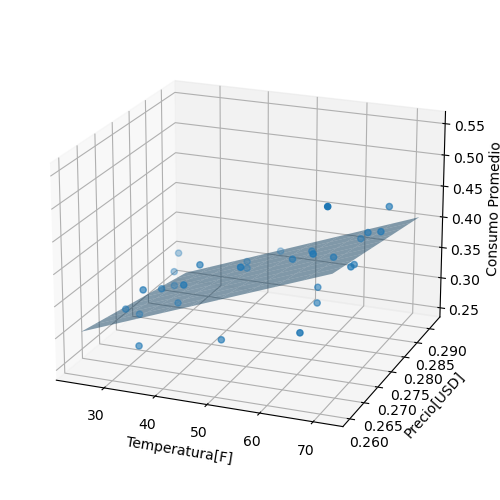

In [6]:
fig = plt.figure(figsize=(5,5), tight_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:,1],A[:,2],b)
ax.set_xlabel('Temperatura[F]')
ax.set_ylabel('Precio[USD]')
ax.set_zlabel('Consumo Promedio')
t_plot = np.linspace(np.amin(A[:,1]), np.amax(A[:,1]), num = 10)
p_plot = np.linspace(np.amin(A[:,2]), np.amax(A[:,2]), num = 10)
T_plot, P_plot = np.meshgrid(t_plot, p_plot)
ax.plot_surface(T_plot, P_plot, theta[0]+theta[1]*T_plot+theta[2]*P_plot, alpha = 0.5);

----

## Modelos lineales en sus parámetros pero no en sus entradas.

### Ejercicio práctico

Conisdere los siguientes datos:

In [7]:
np.random.seed(1234)
x = np.linspace(0,2, num = 10)
y = 2*np.cos(2.0*np.pi*x) + np.sin(4.0*np.pi*x) + 0.4*np.random.randn(len(x))
x_plot = np.linspace(np.amin(x), np.amax(x), num = 100)

- Realice una regresión polinomial sobre $(x,y)$
- Muestre graficamente los datos y el resultado de $f_\theta(x_{plot})$ 
- Use Jupyter widgets para modificar dinamicamente el grado del polinomio entre $M\in[1, 15]$

<IPython.core.display.Javascript object>


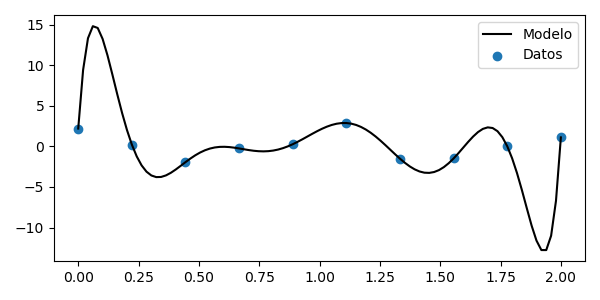

interactive(children=(IntSlider(value=1, description='M', max=16, min=1), Output()), _dom_classes=('widget-int…

In [8]:
fig, ax = plt.subplots(figsize = (6,3), tight_layout =True)

Phi = lambda x,M : np.vstack([x**j for j in range(M)]).T
def update_plot(M):
    ax.cla()
    theta = np.linalg.lstsq(Phi(x,M), y, rcond = None)[0]
    ax.scatter(x,y, label = 'Datos')
    ax.plot(x_plot,np.dot(Phi(x_plot, M), theta), 'k', label= 'Modelo')
    plt.legend()
widgets.interact(update_plot, M = widgets.IntSlider(min=1, max = 16), value = 1);

---

## Sistema infradetermidado (caso $N>M$)

<IPython.core.display.Javascript object>


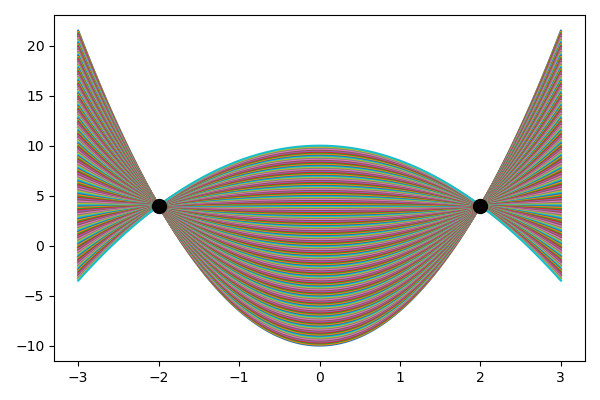

In [9]:
x = np.array([-2, 2])
y = np.array([4, 4])
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
x_plot = np.linspace(-3, 3, num=100)
thetas = np.zeros(shape=(200, 3))
for i, a in enumerate(np.linspace(-10, 10, num=thetas.shape[0])):
    ax.plot(x_plot, a  + (1 - a/4)*x_plot**2)
    thetas[i:] = [a, 0, (1-a/4)]
ax.scatter(x, y, s=100, c='k', zorder=10);

## Complejidad, sobreajuste y generalización 

<IPython.core.display.Javascript object>


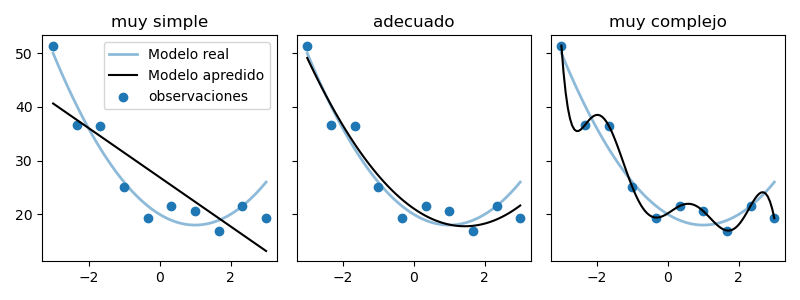

In [10]:
x = np.linspace(-3, 3, num=10)
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)
y_clean = np.poly1d([2, -4, 20]) # 2*x**2 -4*x +20
np.random.seed(1234)
y = y_clean(x) + 3*np.random.randn(len(x))
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
fig, ax = plt.subplots(1, 3, figsize=(8, 3), 
                       tight_layout=True, sharex=True, sharey=True)

for i, (M, title) in enumerate(zip([2, 3, 10], ["muy simple", "adecuado", "muy complejo"])):
    ax[i].plot(x_plot, y_clean(x_plot), lw=2, alpha=.5, label='Modelo real')
    ax[i].scatter(x, y, label='observaciones'); 
    theta = np.linalg.lstsq(poly_basis(x, M), y, rcond=None)[0]
    ax[i].plot(x_plot, np.dot(poly_basis(x_plot, M), theta), 'k-', label='Modelo apredido')
    ax[0].legend()
    ax[i].set_title(title)

### Introdución a las técnicas de validación cruzada

### Ejercicio práctico

Considere los siguientes datos:

In [11]:
x = np.linspace(-5, 5, num=30)
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)
y_clean = np.poly1d([0.1, -0.3, -2, 10]) 
np.random.seed(1234)
y = y_clean(x) + 1.5*np.random.randn(len(x))
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T

Considere el modelo de regresión polinomial

- Separe los datos $(x,y)$ aleatoriamente para crear conjuntos de entrenamiento y validación. Se recomienda usar la función `np.random.permutation` 
- Entrene con el conjunto de entrenamiento
- Encuentre el grado de polinomio que mejor ajusta los datos del conjunto de validación en base al error cuadrático medio:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N e_i^2
$$

donde $e_i = y_i - f_\theta(x_i)$

<IPython.core.display.Javascript object>


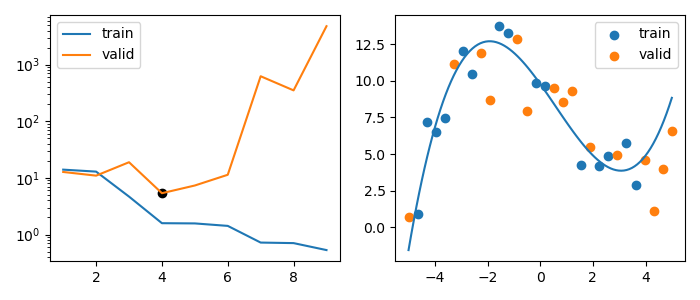

In [12]:
##Separa los datos
N = len(x)
P = np.random.permutation(N)
train_idx, valid_idx = P[:N//2], P[N//2:]
np.random.seed(1234)


grados = np.arange(1,10,step=1)

#Encontrar el grado de polinomio
def MSE(theta,y,Phi):
    e = y-np.dot(Phi,theta)
    return np.mean(e**2)

cost = np.zeros(shape=(len(grados),2))
for i, grado in enumerate(grados):
    theta = np.linalg.lstsq(poly_basis(x[train_idx],grado),y[train_idx], rcond = None)[0]
    cost[i,0] = MSE(theta, y[train_idx],poly_basis(x[train_idx],grado))
    cost[i,1] = MSE(theta, y[valid_idx],poly_basis(x[valid_idx],grado))

fig,ax = plt.subplots(1,2,figsize=(7,3), tight_layout = True)
ax[0].plot(grados,cost[:,0], label = 'train')
ax[0].plot(grados,cost[:,1], label = 'valid')
best_valid_idx = np.argmin(cost[:,1])
ax[0].scatter(grados[best_valid_idx],cost[best_valid_idx,1],marker = 'o', c = 'k')
ax[0].set_yscale('log')
ax[0].legend();

ax[1].scatter(x[train_idx], y[train_idx], label ='train')
ax[1].scatter(x[valid_idx], y[valid_idx], label ='valid')

best_theta = np.linalg.lstsq(poly_basis(x[train_idx],grados[best_valid_idx]),y[train_idx], rcond = None)[0]
ax[1].plot(x_plot, np.dot(poly_basis(x_plot,grados[best_valid_idx]),best_theta))
ax[1].legend();